In [110]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import plotly.plotly as py
import scipy
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from ggplot import *


In [111]:
train =  pd.read_csv("D:\\Kaggle Projects\\Loan\\trainModified.csv")

In [112]:
def train_validate_test_split(df, train_percent=.8, validate_percent=.2, seed=None):
    np.random.seed(seed)
    perm = np.random.permutation(df.index)
    m = len(df)
    train_end = int(train_percent * m)
    validate_end = int(validate_percent * m) + train_end
    train = df.ix[perm[:train_end]]
    validate = df.ix[perm[train_end:validate_end]]
    return train, validate

In [113]:
trainData, validate = train_validate_test_split(train)

In [114]:
trainData['Loan_ID'].nunique()

491

In [115]:
trainData_new = trainData.drop('Loan_ID', 1)

In [116]:
trainData_new.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
329,0,1,0,1,0,2500,0.0,67.0,360,1.0,0,1
227,1,0,2,1,0,6250,1695.0,210.0,360,1.0,2,1
588,1,1,0,1,0,4750,0.0,94.0,360,1.0,2,1
493,0,1,0,0,1,17263,0.0,225.0,360,1.0,2,1
283,0,1,0,1,0,1811,1666.0,54.0,360,1.0,0,1


In [117]:
trainData_new.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.808554,0.358452,0.727088,0.794297,0.132383,5448.107943,1680.948921,147.354379,340.936864,0.853360,1.077393,0.690428
std,0.393841,0.480035,1.001458,0.404626,0.339252,6263.722027,3170.147682,83.388253,66.063189,0.354107,0.834289,0.462789
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,1.000000,0.000000,2853.000000,0.000000,102.500000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,1.000000,0.000000,3813.000000,1213.000000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,0.000000,5807.500000,2279.000000,171.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


In [118]:
LoanID = validate['Loan_ID']
ValData_new = validate.drop('Loan_ID', 1)
y_Validate1 = ValData_new['Loan_Status']
y_Validate = pd.DataFrame(ValData_new)
ValData_new = ValData_new.drop('Loan_Status', 1)

In [119]:
y_train = trainData_new['Loan_Status']

In [120]:
x_train = trainData_new.drop('Loan_Status', 1)

In [121]:
scaler = StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
scaler = StandardScaler().fit(ValData_new)
ValData_new = scaler.transform(ValData_new)


In [122]:
clf = LogisticRegression(solver='lbfgs' , multi_class='multinomial', C=100, tol=0.08)
clf.fit(x_train, y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=1, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.08, verbose=0, warm_start=False)

In [123]:
# Printing the Model score from both train and test data 
print(clf.score(x_train, y_train))

0.820773930754


In [124]:
y_test = clf.predict(ValData_new)


In [125]:
y_test = pd.DataFrame(y_test,columns=['Values'],index=LoanID)


In [126]:
y_Validate1.head(5)

353    0
456    1
383    1
411    1
185    1
Name: Loan_Status, dtype: int64

In [143]:
pred_val = pd.DataFrame(y_Validate1 ) 
Final_pred = pred_val.set_index(LoanID)

In [151]:
list(Final_pred)

['Loan_Status']

In [152]:
list(y_test)

['Values']

In [154]:
Final_pred.to_csv("D:\\Kaggle Projects\\Loan\\Final_pred.csv")
y_test.to_csv("D:\\Kaggle Projects\\Loan\\y_test.csv")

In [155]:
train =  pd.read_csv("D:\\Kaggle Projects\\Loan\\Final_pred.csv")
test =  pd.read_csv("D:\\Kaggle Projects\\Loan\\y_test.csv")

In [161]:
train.head(5)

,Loan_ID,Loan_Status
0,002142,0
1,002459,1
2,002234,1
3,002319,1
4,001640,1


In [162]:
test.head(5)

,Loan_ID,Values
0,002142,0
1,002459,1
2,002234,1
3,002319,1
4,001640,1


In [160]:
train['Loan_ID'] = train['Loan_ID'].map(lambda x: x.lstrip('LP'))
test['Loan_ID'] = test['Loan_ID'].map(lambda x: x.lstrip('LP'))

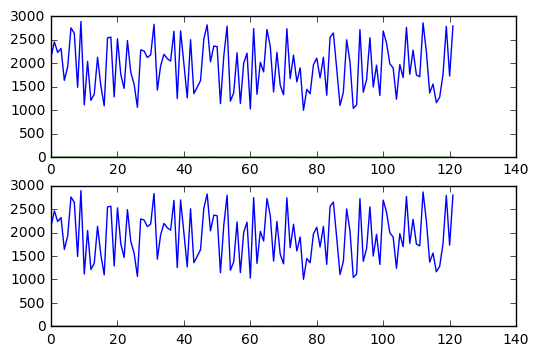

In [174]:
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(train )
ax2 = fig.add_subplot(212)
ax2.plot(test)
plt.show()